In this notebook, We will predict Diabetes on Pima Indians database from https://www.kaggle.com/uciml/pima-indians-diabetes-database. We will use some machine learning algorithms to train our model, get the best model and from it, get a performance baseline using accuracy and ROC_AUC_curve. We will then use the Keras packages to build and train a Neural Network, and compare the performances


## OUTLINE

In [122]:
import numpy as np
import pandas as pd

1- Data Loading and visualization

In [123]:
#Loading the data
diabetes = pd.read_csv(r"C:\Users\NICKEL\OneDrive\Data Science\related papers to my project\data sets + research papers on Pima Diabetes\diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
diabetes.shape

(768, 9)

In [125]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [126]:
#we check to see that there are no nans or missing data. 
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Our data contains no missing values. So we can safely start some data analysis.

2- DATA ANALYSIS AND VISUALIZATION

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
diabetes.Outcome.value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

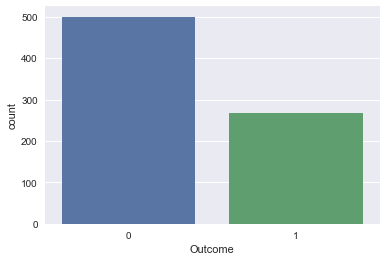

In [129]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'Outcome', data = diabetes)

We can see that about 35 percent of the population in this dataset have diabetes while the remaining 65 percent do not. This means even without modelling(just declaring that no one has diabetes), we can have an accuracy of about 65 percent. Lets see if we get that accuracy after modelling.

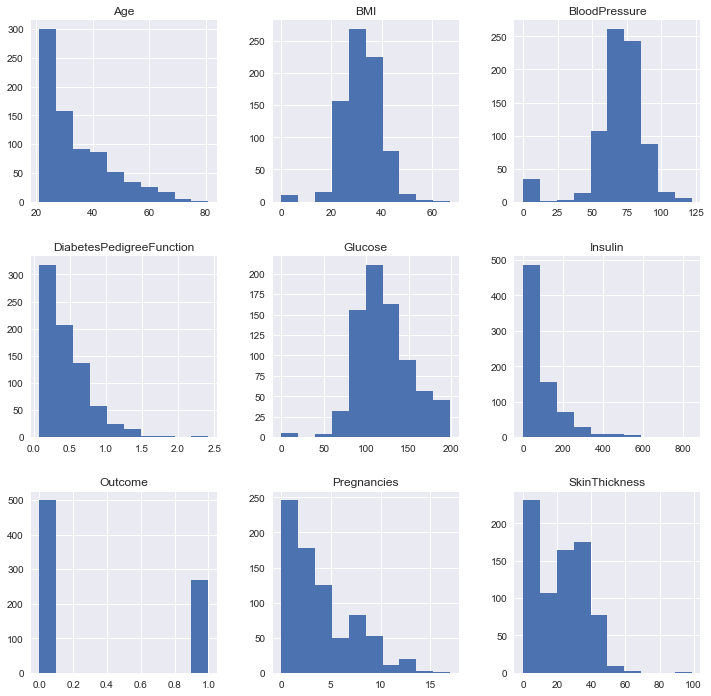

In [130]:
diabetes.hist(figsize = (12, 12));

This above diagrams shows kweness in most of the features.We will handle that in the next section. Now Lets consider only the diabetic patients.

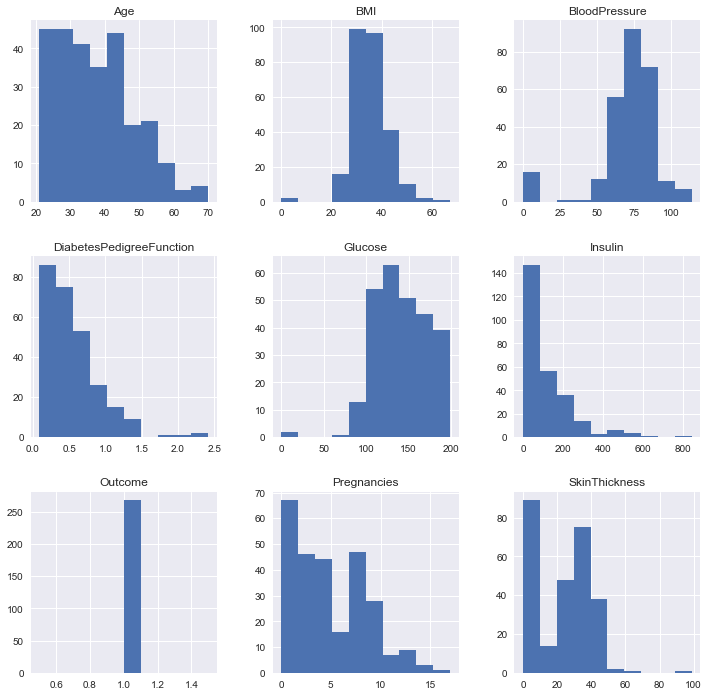

In [131]:
diabetic_patients = diabetes[diabetes['Outcome']==1]
diabetic_patients.hist(figsize = (12, 12));

In [132]:
#We find the number of zeros per column in the dataset
count_zeros = (diabetes == 0).astype(int).sum(axis =0)
count_zeros

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

The above command show that we have zeros in pregnancies, Glucose, Bloodpressure, skin thickness, insulin and BMi. Come to think of it, it does not make a lot of sense for someone to have a glucose level of zero or a BMI of zero. So I presume theses zero values, except for pregnancy, are values that were not keyed in. So i will replace them with the mean.(Except pregancies of course) 

In [133]:
diabetes_no_pregnancy = diabetes.drop(['Pregnancies'], axis = 1)
diabetes_no_pregnancy.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [134]:
impute_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in impute_columns:
    diabetes.loc[(diabetes[i]==0, i)] = diabetes[i].mean()

#we will use the sklearn function imputer
# from sklearn.preprocessing import Imputer

# imputer = Imputer(missing_values = 0, strategy = "mean")

# diabetes = imputer.fit_transform(diabetes_no_pregnancy)
    

In [135]:
any_zeros = (diabetes == 0).astype(int).sum(axis =0)
any_zeros

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [136]:
#we take a look at our original data set
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Predictive modelling 1

In [137]:
#We split the data into train, validation and test set.
#We use the StratifiedShuffleSplit from Sklearn to maintain the same ratio of predictors classes

from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = diabetes.columns[:-1]
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(diabetes[feature_cols], diabetes.Outcome))


In [138]:
# Create the dataframes
X_train_1 = diabetes.loc[train_idx, feature_cols]
y_train = diabetes.loc[train_idx, 'Outcome']

X_test_1  = diabetes.loc[test_idx, feature_cols]
y_test  = diabetes.loc[test_idx, 'Outcome']

In [139]:
#First lets standardize the data except the Outcome column
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train_1)
X_test = StandardScaler().fit_transform(X_test_1)

In [169]:
X_train.shape

(537, 8)

In [170]:
X_test.shape

(231, 8)

In [140]:
#comparing the ratios of classes in both splits. Very representative of the whole data set
y_train.value_counts(normalize = True)

0    0.651769
1    0.348231
Name: Outcome, dtype: float64

In [141]:
y_test.value_counts(normalize = True)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

We have a 65 percent non-diabetic data representation and a 35 percent diabetic data representation justlike the whole data sets

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [143]:
#We define our plot roc_auc_curve

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlabel = 'False positive Rate', ylabel = 'True positive rate',
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

In [144]:
#we define a plot_multiple_roc to visualise all the model curves together

def plot_multiple_roc(y_preds, y_test, model_names):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    
    for i in range (0, len(y_preds)):
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_preds[i])
        label = ""
        if len(model_names) > i:
            label = model_names[i]
        ax.plot(false_positive_rate, true_positive_rate, label=label)
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)
    ax.grid(True)
    
    ax.set(title='ROC Curves for PIMA diabetes problem',
           xlabel = 'False positive Rate', ylabel = 'True positive rate')
        
    if len(model_names) > 0:
        plt.legend(loc=4)

In [145]:
# We do not have a enough data to creat a validation set so we will use k fold cross validation to pick the best model
cv_results = []

labels = ['log_reg', 'linear_svc', 'svc_rbf', 'Random_forest']

models = [LogisticRegression(), LinearSVC(), SVC(kernel = 'rbf'), 
            RandomForestClassifier(n_estimators = 200)]

kf = KFold(n_splits=10, random_state = 42)

for i in models:
    result_cv = cross_val_score(i, X_train, y_train, cv= kf, scoring = 'accuracy')
   
    cv_results.append(result_cv.mean()* 100)
        

In [146]:
cross_val_df = pd.Series(cv_results, index = labels).sort_values(ascending=False).to_frame()
cross_val_df.rename(columns = {0: 'cross validation means b4 feat_sels(%)'}, inplace = True)
print('\nModels with their corresponding cross validation means')
cross_val_df


Models with their corresponding cross validation means


,cross validation means b4 feat_sels(%)
log_reg,77.638015
linear_svc,77.456324
svc_rbf,75.974843
Random_forest,75.433263


In [147]:
validation_probs = []
models_names = ['log_reg', 'linear_svc', 'svc_rbf', 'Random_forest']

for i in [LogisticRegression(),RandomForestClassifier(n_estimators = 200)]:
    i.fit(X_train, y_train)
    validation_probabilities = i.predict_proba(X_test)
    validation_probs.append(validation_probabilities[:, 1])

In [148]:
for j in [LinearSVC(), SVC(kernel = 'rbf')]:
    j.fit(X_train, y_train)
    svc_probabilities = j.decision_function(X_test)
    validation_probs.append(svc_probabilities)

5 - Neural Nets

In [149]:
#preliminaries
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD

In [150]:
#Building a single layered neural network
nn_model = Sequential()
nn_model.add(Dense(15, input_shape = (8,),activation = 'relu'))
#nn_model.add(Dropout(0.1))
nn_model.add(Dense(1, activation ='sigmoid'))

In [151]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 15)                135       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 16        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [152]:
#Creat a training and validation set from the training data
from sklearn.model_selection import train_test_split
x_train_nn, x_val, y_train_nn, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [153]:
#fitting and compiling the model with SGD optimizer
nn_model.compile(SGD(lr = 0.005), 'binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(x_train_nn, y_train_nn, validation_data = (x_val, y_val), epochs = 900, verbose = 1)

Train on 429 samples, validate on 108 samples
Epoch 1/900
429/429 [==============================] - 7s 16ms/step - loss: 0.8629 - acc: 0.4988 - val_loss: 0.8366 - val_acc: 0.5185
Epoch 2/900
429/429 [==============================] - 0s 118us/step - loss: 0.8449 - acc: 0.5221 - val_loss: 0.8214 - val_acc: 0.5370
Epoch 3/900
429/429 [==============================] - 0s 93us/step - loss: 0.8278 - acc: 0.5385 - val_loss: 0.8074 - val_acc: 0.5370
Epoch 4/900
429/429 [==============================] - 0s 79us/step - loss: 0.8120 - acc: 0.5594 - val_loss: 0.7941 - val_acc: 0.5648
Epoch 5/900
429/429 [==============================] - 0s 100us/step - loss: 0.7967 - acc: 0.5781 - val_loss: 0.7817 - val_acc: 0.5833
Epoch 6/900
429/429 [==============================] - 0s 77us/step - loss: 0.7825 - acc: 0.5991 - val_loss: 0.7701 - val_acc: 0.5926
Epoch 7/900
429/429 [==============================] - ETA: 0s - loss: 0.7301 - acc: 0.593 - 0s 98us/step - loss: 0.7693 - acc: 0.6154 - val_loss: 0

Epoch 61/900
429/429 [==============================] - ETA: 0s - loss: 0.5762 - acc: 0.656 - 0s 106us/step - loss: 0.5280 - acc: 0.7110 - val_loss: 0.5729 - val_acc: 0.6759
Epoch 62/900
429/429 [==============================] - 0s 104us/step - loss: 0.5266 - acc: 0.7110 - val_loss: 0.5719 - val_acc: 0.6759
Epoch 63/900
429/429 [==============================] - 0s 105us/step - loss: 0.5252 - acc: 0.7110 - val_loss: 0.5710 - val_acc: 0.6759
Epoch 64/900
429/429 [==============================] - 0s 111us/step - loss: 0.5238 - acc: 0.7156 - val_loss: 0.5702 - val_acc: 0.6759
Epoch 65/900
429/429 [==============================] - 0s 113us/step - loss: 0.5224 - acc: 0.7203 - val_loss: 0.5695 - val_acc: 0.6759
Epoch 66/900
429/429 [==============================] - 0s 101us/step - loss: 0.5211 - acc: 0.7203 - val_loss: 0.5688 - val_acc: 0.6759
Epoch 67/900
429/429 [==============================] - 0s 117us/step - loss: 0.5198 - acc: 0.7203 - val_loss: 0.5681 - val_acc: 0.6759
Epoch 68/9

Epoch 180/900
429/429 [==============================] - 0s 98us/step - loss: 0.4529 - acc: 0.7622 - val_loss: 0.5405 - val_acc: 0.7685
Epoch 181/900
429/429 [==============================] - 0s 98us/step - loss: 0.4526 - acc: 0.7622 - val_loss: 0.5405 - val_acc: 0.7685
Epoch 182/900
429/429 [==============================] - 0s 100us/step - loss: 0.4523 - acc: 0.7622 - val_loss: 0.5404 - val_acc: 0.7685
Epoch 183/900
429/429 [==============================] - 0s 105us/step - loss: 0.4521 - acc: 0.7646 - val_loss: 0.5402 - val_acc: 0.7685
Epoch 184/900
429/429 [==============================] - 0s 91us/step - loss: 0.4518 - acc: 0.7669 - val_loss: 0.5402 - val_acc: 0.7685
Epoch 185/900
429/429 [==============================] - 0s 79us/step - loss: 0.4516 - acc: 0.7669 - val_loss: 0.5401 - val_acc: 0.7685
Epoch 186/900
429/429 [==============================] - 0s 86us/step - loss: 0.4513 - acc: 0.7669 - val_loss: 0.5401 - val_acc: 0.7685
Epoch 187/900
429/429 [=======================

Epoch 240/900
429/429 [==============================] - 0s 93us/step - loss: 0.4390 - acc: 0.7786 - val_loss: 0.5364 - val_acc: 0.7778
Epoch 241/900
429/429 [==============================] - 0s 112us/step - loss: 0.4388 - acc: 0.7786 - val_loss: 0.5364 - val_acc: 0.7778
Epoch 242/900
429/429 [==============================] - 0s 112us/step - loss: 0.4386 - acc: 0.7786 - val_loss: 0.5363 - val_acc: 0.7778
Epoch 243/900
429/429 [==============================] - 0s 96us/step - loss: 0.4384 - acc: 0.7786 - val_loss: 0.5362 - val_acc: 0.7778
Epoch 244/900
429/429 [==============================] - 0s 107us/step - loss: 0.4383 - acc: 0.7786 - val_loss: 0.5361 - val_acc: 0.7778
Epoch 245/900
429/429 [==============================] - 0s 98us/step - loss: 0.4381 - acc: 0.7786 - val_loss: 0.5362 - val_acc: 0.7778
Epoch 246/900
429/429 [==============================] - 0s 100us/step - loss: 0.4379 - acc: 0.7786 - val_loss: 0.5361 - val_acc: 0.7778
Epoch 247/900
429/429 [=====================

Epoch 300/900
429/429 [==============================] - 0s 96us/step - loss: 0.4296 - acc: 0.7855 - val_loss: 0.5336 - val_acc: 0.7870
Epoch 301/900
429/429 [==============================] - 0s 96us/step - loss: 0.4294 - acc: 0.7879 - val_loss: 0.5335 - val_acc: 0.7778
Epoch 302/900
429/429 [==============================] - 0s 93us/step - loss: 0.4292 - acc: 0.7855 - val_loss: 0.5335 - val_acc: 0.7870
Epoch 303/900
429/429 [==============================] - 0s 110us/step - loss: 0.4291 - acc: 0.7855 - val_loss: 0.5335 - val_acc: 0.7870
Epoch 304/900
429/429 [==============================] - 0s 107us/step - loss: 0.4290 - acc: 0.7855 - val_loss: 0.5334 - val_acc: 0.7870
Epoch 305/900
429/429 [==============================] - 0s 105us/step - loss: 0.4289 - acc: 0.7855 - val_loss: 0.5334 - val_acc: 0.7778
Epoch 306/900
429/429 [==============================] - 0s 105us/step - loss: 0.4287 - acc: 0.7879 - val_loss: 0.5333 - val_acc: 0.7685
Epoch 307/900
429/429 [=====================

Epoch 360/900
429/429 [==============================] - 0s 100us/step - loss: 0.4227 - acc: 0.8019 - val_loss: 0.5321 - val_acc: 0.7685
Epoch 361/900
429/429 [==============================] - 0s 96us/step - loss: 0.4225 - acc: 0.8019 - val_loss: 0.5322 - val_acc: 0.7685
Epoch 362/900
429/429 [==============================] - 0s 100us/step - loss: 0.4224 - acc: 0.8019 - val_loss: 0.5321 - val_acc: 0.7685
Epoch 363/900
429/429 [==============================] - 0s 98us/step - loss: 0.4224 - acc: 0.8019 - val_loss: 0.5319 - val_acc: 0.7685
Epoch 364/900
429/429 [==============================] - 0s 103us/step - loss: 0.4223 - acc: 0.8019 - val_loss: 0.5318 - val_acc: 0.7685
Epoch 365/900
429/429 [==============================] - 0s 100us/step - loss: 0.4222 - acc: 0.8019 - val_loss: 0.5315 - val_acc: 0.7685
Epoch 366/900
429/429 [==============================] - 0s 91us/step - loss: 0.4221 - acc: 0.8019 - val_loss: 0.5315 - val_acc: 0.7685
Epoch 367/900
429/429 [=====================

Epoch 478/900
429/429 [==============================] - 0s 104us/step - loss: 0.4125 - acc: 0.8065 - val_loss: 0.5280 - val_acc: 0.7685
Epoch 479/900
429/429 [==============================] - 0s 100us/step - loss: 0.4124 - acc: 0.8065 - val_loss: 0.5278 - val_acc: 0.7685
Epoch 480/900
429/429 [==============================] - 0s 105us/step - loss: 0.4124 - acc: 0.8065 - val_loss: 0.5278 - val_acc: 0.7685
Epoch 481/900
429/429 [==============================] - 0s 101us/step - loss: 0.4122 - acc: 0.8065 - val_loss: 0.5279 - val_acc: 0.7685
Epoch 482/900
429/429 [==============================] - 0s 105us/step - loss: 0.4122 - acc: 0.8089 - val_loss: 0.5279 - val_acc: 0.7685
Epoch 483/900
429/429 [==============================] - 0s 112us/step - loss: 0.4121 - acc: 0.8089 - val_loss: 0.5279 - val_acc: 0.7685
Epoch 484/900
429/429 [==============================] - 0s 114us/step - loss: 0.4120 - acc: 0.8089 - val_loss: 0.5279 - val_acc: 0.7685
Epoch 485/900
429/429 [==================

Epoch 538/900
429/429 [==============================] - 0s 93us/step - loss: 0.4086 - acc: 0.8135 - val_loss: 0.5260 - val_acc: 0.7685
Epoch 539/900
429/429 [==============================] - 0s 103us/step - loss: 0.4086 - acc: 0.8135 - val_loss: 0.5260 - val_acc: 0.7685
Epoch 540/900
429/429 [==============================] - 0s 96us/step - loss: 0.4085 - acc: 0.8135 - val_loss: 0.5261 - val_acc: 0.7685
Epoch 541/900
429/429 [==============================] - 0s 98us/step - loss: 0.4084 - acc: 0.8135 - val_loss: 0.5259 - val_acc: 0.7685
Epoch 542/900
429/429 [==============================] - 0s 96us/step - loss: 0.4083 - acc: 0.8135 - val_loss: 0.5260 - val_acc: 0.7685
Epoch 543/900
429/429 [==============================] - 0s 96us/step - loss: 0.4083 - acc: 0.8159 - val_loss: 0.5260 - val_acc: 0.7778
Epoch 544/900
429/429 [==============================] - 0s 98us/step - loss: 0.4082 - acc: 0.8135 - val_loss: 0.5259 - val_acc: 0.7778
Epoch 545/900
429/429 [========================

429/429 [==============================] - 0s 91us/step - loss: 0.4027 - acc: 0.8252 - val_loss: 0.5244 - val_acc: 0.7778
Epoch 659/900
429/429 [==============================] - 0s 98us/step - loss: 0.4027 - acc: 0.8252 - val_loss: 0.5244 - val_acc: 0.7778
Epoch 660/900
429/429 [==============================] - 0s 93us/step - loss: 0.4026 - acc: 0.8252 - val_loss: 0.5242 - val_acc: 0.7778
Epoch 661/900
429/429 [==============================] - 0s 91us/step - loss: 0.4026 - acc: 0.8252 - val_loss: 0.5243 - val_acc: 0.7778
Epoch 662/900
429/429 [==============================] - 0s 86us/step - loss: 0.4026 - acc: 0.8252 - val_loss: 0.5244 - val_acc: 0.7778
Epoch 663/900
429/429 [==============================] - 0s 89us/step - loss: 0.4025 - acc: 0.8252 - val_loss: 0.5244 - val_acc: 0.7778
Epoch 664/900
429/429 [==============================] - 0s 84us/step - loss: 0.4025 - acc: 0.8228 - val_loss: 0.5245 - val_acc: 0.7778
Epoch 665/900
429/429 [==============================] - 0s 84

Epoch 718/900
429/429 [==============================] - 0s 79us/step - loss: 0.4009 - acc: 0.8275 - val_loss: 0.5249 - val_acc: 0.7778
Epoch 719/900
429/429 [==============================] - 0s 84us/step - loss: 0.4008 - acc: 0.8275 - val_loss: 0.5249 - val_acc: 0.7778
Epoch 720/900
429/429 [==============================] - 0s 89us/step - loss: 0.4008 - acc: 0.8275 - val_loss: 0.5248 - val_acc: 0.7778
Epoch 721/900
429/429 [==============================] - 0s 84us/step - loss: 0.4008 - acc: 0.8275 - val_loss: 0.5247 - val_acc: 0.7778
Epoch 722/900
429/429 [==============================] - 0s 89us/step - loss: 0.4008 - acc: 0.8275 - val_loss: 0.5246 - val_acc: 0.7778
Epoch 723/900
429/429 [==============================] - 0s 98us/step - loss: 0.4007 - acc: 0.8275 - val_loss: 0.5245 - val_acc: 0.7778
Epoch 724/900
429/429 [==============================] - 0s 91us/step - loss: 0.4008 - acc: 0.8275 - val_loss: 0.5245 - val_acc: 0.7778
Epoch 725/900
429/429 [=========================

429/429 [==============================] - 0s 75us/step - loss: 0.3979 - acc: 0.8298 - val_loss: 0.5254 - val_acc: 0.7685
Epoch 838/900
429/429 [==============================] - 0s 86us/step - loss: 0.3979 - acc: 0.8298 - val_loss: 0.5254 - val_acc: 0.7685
Epoch 839/900
429/429 [==============================] - 0s 84us/step - loss: 0.3978 - acc: 0.8298 - val_loss: 0.5254 - val_acc: 0.7685
Epoch 840/900
429/429 [==============================] - 0s 86us/step - loss: 0.3978 - acc: 0.8275 - val_loss: 0.5254 - val_acc: 0.7685
Epoch 841/900
429/429 [==============================] - 0s 89us/step - loss: 0.3978 - acc: 0.8298 - val_loss: 0.5254 - val_acc: 0.7685
Epoch 842/900
429/429 [==============================] - 0s 96us/step - loss: 0.3977 - acc: 0.8275 - val_loss: 0.5255 - val_acc: 0.7685
Epoch 843/900
429/429 [==============================] - 0s 82us/step - loss: 0.3977 - acc: 0.8298 - val_loss: 0.5257 - val_acc: 0.7685
Epoch 844/900
429/429 [==============================] - 0s 89

Epoch 897/900
429/429 [==============================] - 0s 79us/step - loss: 0.3964 - acc: 0.8252 - val_loss: 0.5255 - val_acc: 0.7685
Epoch 898/900
429/429 [==============================] - 0s 98us/step - loss: 0.3963 - acc: 0.8252 - val_loss: 0.5256 - val_acc: 0.7685
Epoch 899/900
429/429 [==============================] - 0s 86us/step - loss: 0.3963 - acc: 0.8252 - val_loss: 0.5254 - val_acc: 0.7685
Epoch 900/900
429/429 [==============================] - ETA: 0s - loss: 0.2815 - acc: 0.906 - 0s 100us/step - loss: 0.3963 - acc: 0.8252 - val_loss: 0.5253 - val_acc: 0.7685


In [154]:
nn_predict = nn_model.predict_classes(X_test)
nn_proba_predict = nn_model.predict(X_test)

In [155]:
#lets take a look
nn_predict[:10]

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [156]:
nn_proba_predict[:10]

array([[0.3149966 ],
       [0.45327353],
       [0.7358982 ],
       [0.70846164],
       [0.66553164],
       [0.01756994],
       [0.6503652 ],
       [0.05534679],
       [0.00500213],
       [0.3886146 ]], dtype=float32)

In [157]:
accuracy_nn = accuracy_score(y_test,nn_predict)

print('The accuracy for the Neural network is {:.3f}'.format(accuracy_nn))
print('The roc-auc for the Neural network is {:.3f}'.format(roc_auc_score(y_test,nn_proba_predict)))

The accuracy for the Neural network is 0.740
The roc-auc for the Neural network is 0.821


In [158]:
#lets take a look at the run history
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

we can use the history to plot the training loss and the validation loss over the different epochs.

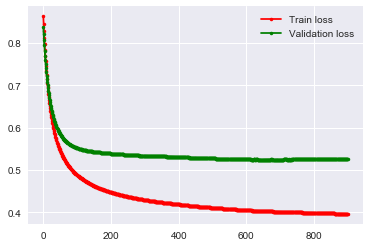

In [159]:
#Plotting the training and validation losses over the different epochs

fig, ax = plt.subplots()

ax.plot(history.history['loss'], 'r', marker = '.', label = 'Train loss')

ax.plot(history.history['val_loss'], 'g', marker = '.', label = 'Validation loss')

ax.legend()

In [160]:
Accuracies = pd.DataFrame(cross_val_df )
Accuracies.rename(columns = {"cross validation means b4 feat_sels(%)" : "Models_Accuracies"}, inplace = True)
Accuracies.loc['Neural_nets'] = accuracy_nn*100
Accuracies

,Models_Accuracies
log_reg,77.638015
linear_svc,77.456324
svc_rbf,75.974843
Random_forest,75.433263
Neural_nets,74.025974


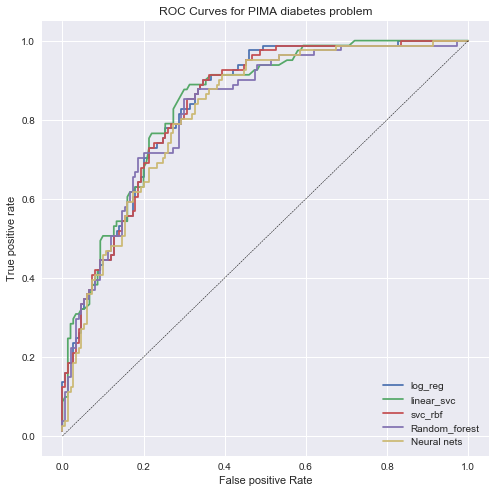

In [161]:
validation_probs.append(nn_proba_predict)
model_names_all = ['log_reg', 'linear_svc', 'svc_rbf', 'Random_forest', 'Neural nets']
plot_multiple_roc(validation_probs, y_test, model_names_all)

In [162]:
rf_model = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
rf_proba_predict = rf_model.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, rf_proba_predict)

rbf_svc = SVC(kernel ='rbf').fit(X_train, y_train)
rbf_proba_predict = rbf_svc.decision_function(X_test)
rbf_auc = roc_auc_score(y_test, rbf_proba_predict)

lin_svc = LinearSVC().fit(X_train, y_train)
lsvc_proba_predict = lin_svc.decision_function(X_test)
lsvc_auc = roc_auc_score(y_test, lsvc_proba_predict)

log_reg = LogisticRegression().fit (X_train, y_train)
log_reg_proba_predict = log_reg.predict_proba(X_test)[:,1]
log_reg_auc = roc_auc_score(y_test, log_reg_proba_predict)

nn_auc = roc_auc_score(y_test, nn_proba_predict)

AUCROC_scores = [log_reg_auc*100, lsvc_auc*100, rbf_auc*100, rf_auc*100, nn_auc*100]
labels = ['log_reg', 'linear_svc', 'svc_rbf', 'Random_forest', 'Neural_nets']


RocAuc_score = pd.Series(AUCROC_scores, index = labels).sort_values(ascending=False).to_frame()
RocAuc_score.rename(columns = {0: 'Roc_auc_scores'}, inplace = True)
print('\nModels with their corresponding Roc_AUC_score')
RocAuc_score


Models with their corresponding Roc_AUC_score


,Roc_auc_scores
Random_forest,84.493827
log_reg,83.827160
linear_svc,83.802469
svc_rbf,82.543210
Neural_nets,82.090535


## Correlation and Feature Importance

We check the correlation between each columns and the the outcome column(those with diabetes- We used it up, it is calles diabetic_patients). This will help us pick the best 4 features in the set

In [163]:
diabetic_patients = diabetes[diabetes['Outcome']==1]
non_diabetics = list(diabetes.columns[:-1])
correlations = diabetes[non_diabetics].corrwith(diabetic_patients)
correlations.sort_values(inplace= True)

correlations

BMI                         1.0
BloodPressure               1.0
Glucose                     1.0
Insulin                     1.0
SkinThickness               1.0
Age                         1.0
DiabetesPedigreeFunction    1.0
Pregnancies                 1.0
Outcome                     NaN
dtype: float64

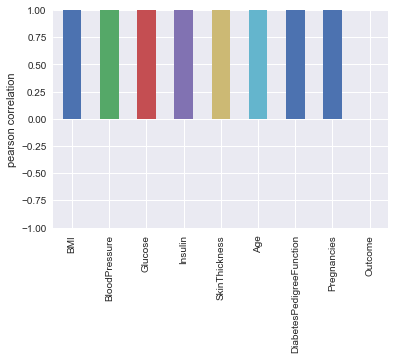

In [164]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [165]:
#####No idea why i am having this kind of correllation#####

In [168]:
#Using the random forest classifier to get the most important features

X = diabetes[diabetes.columns[:-1]]
Y = diabetes['Outcome']

rf = RandomForestClassifier(n_estimators = 200).fit(X, Y)
most_important = pd.Series(rf.feature_importances_ *100, index=X.columns).sort_values(ascending =False).to_frame()
most_important.rename(columns = {0: 'percentage importance'}, inplace = True)
most_important

,percentage importance
Glucose,25.531204
BMI,16.611817
Age,13.963501
DiabetesPedigreeFunction,12.415163
BloodPressure,8.422233
Pregnancies,8.203880
Insulin,7.778867
SkinThickness,7.073334


We see that the 4 most important feature in this dataset are Glucose, BMI, Age, DiabetesPedigreeFunction. We will use these features plus the Outcome as our new dataset, and drop the other features, calcualte the accuracies and see if they are very different from what we got before.

In [63]:
diabetes_2 = diabetes.drop(['Pregnancies', 'Insulin', 'SkinThickness'], axis = 1)

diabetes_2.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,33.6,0.627,50,1
1,85.0,66.0,26.6,0.351,31,0
2,183.0,64.0,23.3,0.672,32,1
3,89.0,66.0,28.1,0.167,21,0
4,137.0,40.0,43.1,2.288,33,1


In [64]:
feature_cols_2 = diabetes_2.columns[:-1]
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx_2, test_idx_2 = next(strat_shuf_split.split(diabetes_2[feature_cols_2], diabetes_2.Outcome))


In [65]:
# Create the dataframes
X_train_2 = diabetes_2.loc[train_idx_2, feature_cols_2]
y_train_3 = diabetes_2.loc[train_idx_2, 'Outcome']

X_test_2  = diabetes_2.loc[test_idx_2, feature_cols_2]
y_test_3  = diabetes_2.loc[test_idx_2, 'Outcome']

In [66]:
X_train_3 = StandardScaler().fit_transform(X_train_2)
X_test_3 = StandardScaler().fit_transform(X_test_2)

In [67]:
# We do not have a enough data to creat a validation set so we will use k fold cross validation to pick the best model
cv_results_2 = []

labels = ['log_reg', 'linear_svc', 'svc_rbf', 'Random_forest']

models = [LogisticRegression(), LinearSVC(), SVC(kernel = 'rbf'), 
            RandomForestClassifier(n_estimators = 200)]

kf_2 = KFold(n_splits=10, random_state = 42)

for i in models:
    result_cv_2 = cross_val_score(i, X_train_3, y_train_3, cv= kf_2, scoring = 'accuracy')
   
    cv_results_2.append(result_cv_2.mean()* 100)
        

In [68]:
feature_sel_cross_val = pd.Series(cv_results_2, index = labels).sort_values(ascending=False).to_frame()
feature_sel_cross_val.rename(columns = {0: 'cross_val with feature selection'}, inplace = True)
print('\nModels with their corresponding cross validation means after feature selection:')
feature_sel_cross_val


Models with their corresponding cross validation means after feature selection:


,cross_val with feature selection
linear_svc,77.830189
log_reg,77.830189
svc_rbf,76.897275
Random_forest,76.530398


In [69]:
validation_probs_fs = []
models_names = ['log_reg_fs', 'linear_svc_fs', 'svc_rbf_fs', 'Random_forest_fs']

for i in [LogisticRegression(),RandomForestClassifier(n_estimators = 200)]:
    i.fit(X_train_3, y_train_3)
    validation_probabilities = i.predict_proba(X_test_3)
    validation_probs_fs.append(validation_probabilities[:, 1])

In [70]:
for j in [LinearSVC(), SVC(kernel = 'rbf')]:
    j.fit(X_train_3, y_train_3)
    svc_probabilities = j.decision_function(X_test_3)
    validation_probs_fs.append(svc_probabilities)

5_Neural Networks

In [99]:
#Our input_shape has changed, was 8, now it is 5
#Building a single layered neural network
nn_model_2 = Sequential()
nn_model_2.add(Dense(15, input_shape = (5,),activation = 'relu'))
#nn_model.add(Dropout(0.1))
nn_model_2.add(Dense(1, activation ='sigmoid'))

In [100]:
#Creat a training and validation set from the training data
from sklearn.model_selection import train_test_split
x_train_nn3, x_val_3, y_train_nn3, y_val_3 = train_test_split(X_train_3, y_train_3, test_size = 0.2, random_state = 42)

In [101]:
#fitting and compiling the model with SGD optimizer
nn_model_2.compile(SGD(lr = 0.005), 'binary_crossentropy', metrics=['accuracy'])

history_2 = nn_model_2.fit(x_train_nn3, y_train_nn3, validation_data = (x_val_3, y_val_3), epochs = 900)

Train on 429 samples, validate on 108 samples
Epoch 1/900
429/429 [==============================] - 0s 887us/step - loss: 0.8166 - acc: 0.4033 - val_loss: 0.7654 - val_acc: 0.4167
Epoch 2/900
429/429 [==============================] - 0s 93us/step - loss: 0.8012 - acc: 0.4103 - val_loss: 0.7536 - val_acc: 0.4074
Epoch 3/900
429/429 [==============================] - 0s 75us/step - loss: 0.7869 - acc: 0.4242 - val_loss: 0.7425 - val_acc: 0.4259
Epoch 4/900
429/429 [==============================] - 0s 93us/step - loss: 0.7729 - acc: 0.4359 - val_loss: 0.7321 - val_acc: 0.4444
Epoch 5/900
429/429 [==============================] - 0s 84us/step - loss: 0.7597 - acc: 0.4452 - val_loss: 0.7223 - val_acc: 0.4630
Epoch 6/900
429/429 [==============================] - 0s 93us/step - loss: 0.7473 - acc: 0.4685 - val_loss: 0.7128 - val_acc: 0.4722
Epoch 7/900
429/429 [==============================] - 0s 75us/step - loss: 0.7350 - acc: 0.4825 - val_loss: 0.7040 - val_acc: 0.4907
Epoch 8/900
429

429/429 [==============================] - 0s 75us/step - loss: 0.4526 - acc: 0.7832 - val_loss: 0.5211 - val_acc: 0.7500
Epoch 122/900
429/429 [==============================] - 0s 75us/step - loss: 0.4524 - acc: 0.7832 - val_loss: 0.5212 - val_acc: 0.7500
Epoch 123/900
429/429 [==============================] - 0s 75us/step - loss: 0.4520 - acc: 0.7832 - val_loss: 0.5214 - val_acc: 0.7500
Epoch 124/900
429/429 [==============================] - 0s 84us/step - loss: 0.4518 - acc: 0.7832 - val_loss: 0.5214 - val_acc: 0.7500
Epoch 125/900
429/429 [==============================] - 0s 93us/step - loss: 0.4515 - acc: 0.7855 - val_loss: 0.5215 - val_acc: 0.7500
Epoch 126/900
429/429 [==============================] - 0s 84us/step - loss: 0.4512 - acc: 0.7832 - val_loss: 0.5215 - val_acc: 0.7500
Epoch 127/900
429/429 [==============================] - 0s 84us/step - loss: 0.4509 - acc: 0.7855 - val_loss: 0.5216 - val_acc: 0.7500
Epoch 128/900
429/429 [==============================] - 0s 84

429/429 [==============================] - 0s 93us/step - loss: 0.4349 - acc: 0.7855 - val_loss: 0.5313 - val_acc: 0.7500
Epoch 242/900
429/429 [==============================] - 0s 84us/step - loss: 0.4348 - acc: 0.7855 - val_loss: 0.5314 - val_acc: 0.7500
Epoch 243/900
429/429 [==============================] - 0s 75us/step - loss: 0.4347 - acc: 0.7855 - val_loss: 0.5315 - val_acc: 0.7500
Epoch 244/900
429/429 [==============================] - 0s 84us/step - loss: 0.4346 - acc: 0.7855 - val_loss: 0.5316 - val_acc: 0.7500
Epoch 245/900
429/429 [==============================] - 0s 93us/step - loss: 0.4345 - acc: 0.7855 - val_loss: 0.5315 - val_acc: 0.7500
Epoch 246/900
429/429 [==============================] - 0s 84us/step - loss: 0.4345 - acc: 0.7855 - val_loss: 0.5315 - val_acc: 0.7500
Epoch 247/900
429/429 [==============================] - 0s 93us/step - loss: 0.4344 - acc: 0.7855 - val_loss: 0.5316 - val_acc: 0.7500
Epoch 248/900
429/429 [==============================] - 0s 93

429/429 [==============================] - 0s 75us/step - loss: 0.4278 - acc: 0.7925 - val_loss: 0.5353 - val_acc: 0.7593
Epoch 362/900
429/429 [==============================] - 0s 75us/step - loss: 0.4278 - acc: 0.7925 - val_loss: 0.5354 - val_acc: 0.7593
Epoch 363/900
429/429 [==============================] - 0s 75us/step - loss: 0.4277 - acc: 0.7925 - val_loss: 0.5354 - val_acc: 0.7593
Epoch 364/900
429/429 [==============================] - 0s 75us/step - loss: 0.4277 - acc: 0.7925 - val_loss: 0.5353 - val_acc: 0.7593
Epoch 365/900
429/429 [==============================] - 0s 75us/step - loss: 0.4276 - acc: 0.7925 - val_loss: 0.5353 - val_acc: 0.7593
Epoch 366/900
429/429 [==============================] - 0s 75us/step - loss: 0.4276 - acc: 0.7925 - val_loss: 0.5352 - val_acc: 0.7593
Epoch 367/900
429/429 [==============================] - 0s 75us/step - loss: 0.4276 - acc: 0.7925 - val_loss: 0.5352 - val_acc: 0.7593
Epoch 368/900
429/429 [==============================] - 0s 84

429/429 [==============================] - 0s 75us/step - loss: 0.4231 - acc: 0.8019 - val_loss: 0.5344 - val_acc: 0.7593
Epoch 482/900
429/429 [==============================] - 0s 84us/step - loss: 0.4231 - acc: 0.8019 - val_loss: 0.5343 - val_acc: 0.7593
Epoch 483/900
429/429 [==============================] - 0s 75us/step - loss: 0.4230 - acc: 0.8019 - val_loss: 0.5343 - val_acc: 0.7593
Epoch 484/900
429/429 [==============================] - 0s 84us/step - loss: 0.4230 - acc: 0.8019 - val_loss: 0.5342 - val_acc: 0.7593
Epoch 485/900
429/429 [==============================] - 0s 84us/step - loss: 0.4230 - acc: 0.8019 - val_loss: 0.5343 - val_acc: 0.7593
Epoch 486/900
429/429 [==============================] - 0s 84us/step - loss: 0.4230 - acc: 0.8019 - val_loss: 0.5343 - val_acc: 0.7593
Epoch 487/900
429/429 [==============================] - 0s 84us/step - loss: 0.4230 - acc: 0.8019 - val_loss: 0.5344 - val_acc: 0.7593
Epoch 488/900
429/429 [==============================] - 0s 84

429/429 [==============================] - 0s 84us/step - loss: 0.4189 - acc: 0.8019 - val_loss: 0.5364 - val_acc: 0.7593
Epoch 602/900
429/429 [==============================] - 0s 84us/step - loss: 0.4188 - acc: 0.8019 - val_loss: 0.5365 - val_acc: 0.7593
Epoch 603/900
429/429 [==============================] - 0s 84us/step - loss: 0.4187 - acc: 0.8019 - val_loss: 0.5366 - val_acc: 0.7593
Epoch 604/900
429/429 [==============================] - 0s 84us/step - loss: 0.4187 - acc: 0.8019 - val_loss: 0.5365 - val_acc: 0.7593
Epoch 605/900
429/429 [==============================] - 0s 84us/step - loss: 0.4187 - acc: 0.8019 - val_loss: 0.5366 - val_acc: 0.7593
Epoch 606/900
429/429 [==============================] - 0s 84us/step - loss: 0.4186 - acc: 0.8019 - val_loss: 0.5366 - val_acc: 0.7593
Epoch 607/900
429/429 [==============================] - 0s 84us/step - loss: 0.4186 - acc: 0.7995 - val_loss: 0.5366 - val_acc: 0.7593
Epoch 608/900
429/429 [==============================] - 0s 75

429/429 [==============================] - 0s 75us/step - loss: 0.4152 - acc: 0.7995 - val_loss: 0.5381 - val_acc: 0.7593
Epoch 722/900
429/429 [==============================] - 0s 65us/step - loss: 0.4152 - acc: 0.7995 - val_loss: 0.5381 - val_acc: 0.7593
Epoch 723/900
429/429 [==============================] - 0s 75us/step - loss: 0.4151 - acc: 0.7995 - val_loss: 0.5381 - val_acc: 0.7593
Epoch 724/900
429/429 [==============================] - 0s 84us/step - loss: 0.4152 - acc: 0.7995 - val_loss: 0.5382 - val_acc: 0.7593
Epoch 725/900
429/429 [==============================] - 0s 84us/step - loss: 0.4151 - acc: 0.7995 - val_loss: 0.5381 - val_acc: 0.7593
Epoch 726/900
429/429 [==============================] - 0s 75us/step - loss: 0.4150 - acc: 0.7995 - val_loss: 0.5381 - val_acc: 0.7593
Epoch 727/900
429/429 [==============================] - 0s 75us/step - loss: 0.4150 - acc: 0.7995 - val_loss: 0.5381 - val_acc: 0.7593
Epoch 728/900
429/429 [==============================] - 0s 75

429/429 [==============================] - 0s 75us/step - loss: 0.4110 - acc: 0.7995 - val_loss: 0.5385 - val_acc: 0.7685
Epoch 842/900
429/429 [==============================] - 0s 84us/step - loss: 0.4109 - acc: 0.8042 - val_loss: 0.5386 - val_acc: 0.7685
Epoch 843/900
429/429 [==============================] - 0s 75us/step - loss: 0.4110 - acc: 0.7995 - val_loss: 0.5383 - val_acc: 0.7685
Epoch 844/900
429/429 [==============================] - 0s 84us/step - loss: 0.4109 - acc: 0.8042 - val_loss: 0.5384 - val_acc: 0.7685
Epoch 845/900
429/429 [==============================] - 0s 84us/step - loss: 0.4108 - acc: 0.8042 - val_loss: 0.5383 - val_acc: 0.7685
Epoch 846/900
429/429 [==============================] - 0s 75us/step - loss: 0.4108 - acc: 0.8042 - val_loss: 0.5384 - val_acc: 0.7685
Epoch 847/900
429/429 [==============================] - 0s 84us/step - loss: 0.4108 - acc: 0.8042 - val_loss: 0.5384 - val_acc: 0.7685
Epoch 848/900
429/429 [==============================] - 0s 84

In [102]:
nn_2_predict_fs = nn_model_2.predict_classes(X_test_3)
nn_2_proba_predict_fs = nn_model_2.predict(X_test_3)

In [103]:
accuracy_nn_2 = accuracy_score(y_test_3,nn_2_predict_fs)

print('The accuracy for the Neural nets after feature selection is {:.3f}'.format(accuracy_nn_2))
print('The roc-auc for the Neural nets after feature selection is {:.3f}'.format(roc_auc_score(y_test_3,nn_2_proba_predict_fs)))

The accuracy for the Neural nets after feature selection is 0.745
The roc-auc for the Neural nets after feature selection is 0.824


In [104]:
history_2.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

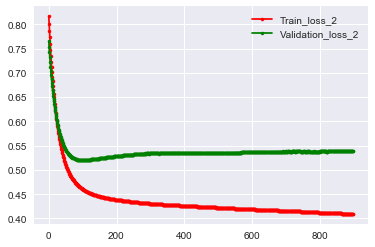

In [105]:
#Plotting the training and validation losses over the different epochs

fig, ax = plt.subplots()

ax.plot(history_2.history['loss'], 'r', marker = '.', label = 'Train_loss_2')

ax.plot(history_2.history['val_loss'], 'g', marker = '.', label = 'Validation_loss_2')

ax.legend()

Observation:
    Validation loss stable from 320 epoches
    training loss also stable 
    

In [106]:
Accuracies_fs = pd.DataFrame(feature_sel_cross_val )
Accuracies_fs.rename(columns = {"cross_val with feature selection" : "Models_Accuracies with feature_sel"}, inplace = True)
Accuracies_fs.loc['Neural_nets'] = accuracy_nn_2*100
Accuracies_fs

,Models_Accuracies with feature_sel
linear_svc,77.830189
log_reg,77.830189
svc_rbf,76.897275
Random_forest,76.530398
Neural_nets,74.458874


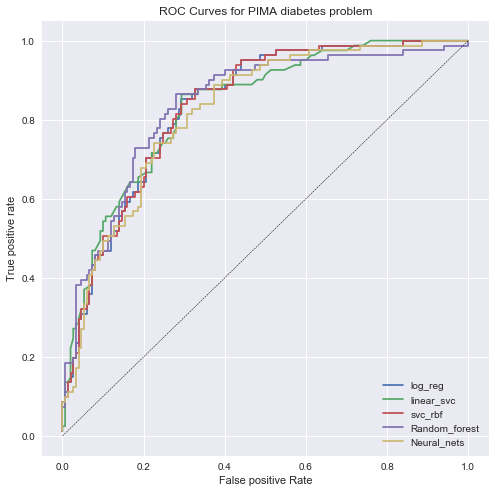

In [83]:
validation_probs_fs.append(nn_2_proba_predict_fs)
all_models_names = ['log_reg', 'linear_svc', 'svc_rbf', 'Random_forest', 'Neural_nets']
plot_multiple_roc(validation_probs_fs, y_test, all_models_names)

Observation:
    support vector machine with rbf has the best accuracy. 
    
    linear_support vector machine and logistic regression are tieed at 77.8% accuracies

In [86]:
rf_model_fs = RandomForestClassifier(n_estimators=200).fit(X_train_3, y_train_3)
rf_proba_predict_fs = rf_model_fs.predict_proba(X_test_3)[:,1]
rf_auc_fs = roc_auc_score(y_test_3, rf_proba_predict_fs)

rbf_svc_fs = SVC(kernel ='rbf').fit(X_train_3, y_train_3)
rbf_proba_predict_fs = rbf_svc_fs.decision_function(X_test_3)
rbf_auc_fs = roc_auc_score(y_test_3, rbf_proba_predict_fs)

lin_svc_fs = LinearSVC().fit(X_train_3, y_train_3)
lsvc_proba_predict_fs = lin_svc_fs.decision_function(X_test_3)
lsvc_auc_fs = roc_auc_score(y_test_3, lsvc_proba_predict_fs)

log_reg_fs = LogisticRegression().fit (X_train_3, y_train_3)
log_reg_proba_predict_fs = log_reg_fs.predict_proba(X_test_3)[:,1]
log_reg_auc_fs = roc_auc_score(y_test_3, log_reg_proba_predict_fs)

nn_auc_fs = roc_auc_score(y_test_3, nn_2_proba_predict_fs)

AUCROC_scores_fs = [log_reg_auc_fs*100, lsvc_auc_fs*100, rbf_auc_fs*100, rf_auc_fs*100, nn_auc_fs*100]
labels = ['log_reg', 'linear_svc', 'svc_rbf', 'Random_forest', 'Neural_nets']


RocAuc_score_fs = pd.Series(AUCROC_scores_fs, index = labels).sort_values(ascending=False).to_frame()
RocAuc_score_fs.rename(columns = {0: 'Roc_auc_scores with feat selection'}, inplace = True)
print('\nModels with their corresponding Roc_AUC_score')
RocAuc_score_fs


Models with their corresponding Roc_AUC_score


,Roc_auc_scores with feat selection
svc_rbf,83.761317
Random_forest,83.625514
log_reg,83.432099
linear_svc,83.415638
Neural_nets,82.189300


In [ ]:
#Creating a submission file

# Pima_diabetes_submission = pd.DataFrame( {'Outcome': rbf_2_predict})
# Pima_diabetes_submission.to_csv('Pima_Diabetes_Prediction.csv', index = False)